# How to run the code

All code in this repository that has been developed for the final is contained in the module ```final.py```. All other code is separated into many other files and was developed for the midterm. 

To run the code for the final, open a python envrironment in the directory and import the module using ```import final.py```.


## Bibliography
We used the following resources to complete this project:

    * [os library documentation](https://docs.python.org/3/library/os.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import final as fin

In the following couple of cells

In [2]:
#Define fitting functions

def sine(x, a, b, c, d):
    return a*np.sin(b*x+c) + d

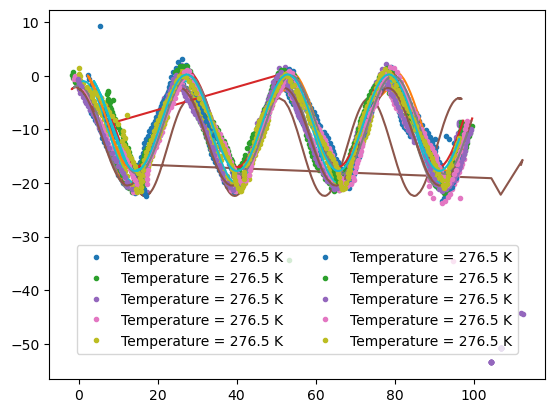

In [3]:
#Produce Figure of GPS motion with axes in meters and origin at starting point

#Get all Temperatures
T = []
for i in range(10):
    T = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.md')[i],
        skiprows=5,
        delimiter = ',',
        unpack=True)

#Covert temperatures to Kelvin
T_K = fin.fahrenheit_to_kelvin(T)

#Initialize lists to plot
tlist = []
latlist = []
lonlist = []

#Loop over all files using list_files function from final.py and add their data to the overall lists
for i in range(10):
    (t, lat, lon, alt, alt84, speed, 
    direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.csv')[i],
        skiprows=1,
        delimiter = ',',
        unpack=True)

    tlist.append(t)
    latlist.append(lat)
    lonlist.append(lon)

#Set origin as final position of first trial 
# (setting  origin as initial makes all x-data negative and i think that's ugly)
# and multiply latitude and longitude by 
# radius of the Earth in meters to get meters on axes

lat_centered = []
lon_centered = []

for lat in latlist:
    lat_centered.append((lat - latlist[0][-1])*63781.37)
for lon in lonlist:
    lon_centered.append((lon - lonlist[0][-1])*63781.37)

#Plot all the data with the legend
for i in range(len(lat_centered)):
    plt.plot(lon_centered[i],lat_centered[i], '.', label = f'Temperature = {round(T_K,1)} K')
    plt.plot(lon_centered[i],sine(lon_centered[i],*fin.curvefit_wrapper(sine, lon_centered[i], lat_centered[i], p0 = [-20, 1/3.5, -20, -10])))
plt.legend(ncol = 2, bbox_to_anchor=(0.5, 0.05), loc='lower center');